In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [18]:
df  = pd.read_csv('mall.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
X = df.drop(columns = ['CustomerID' , 'Gender' , 'Age'] , axis = 1 ).values

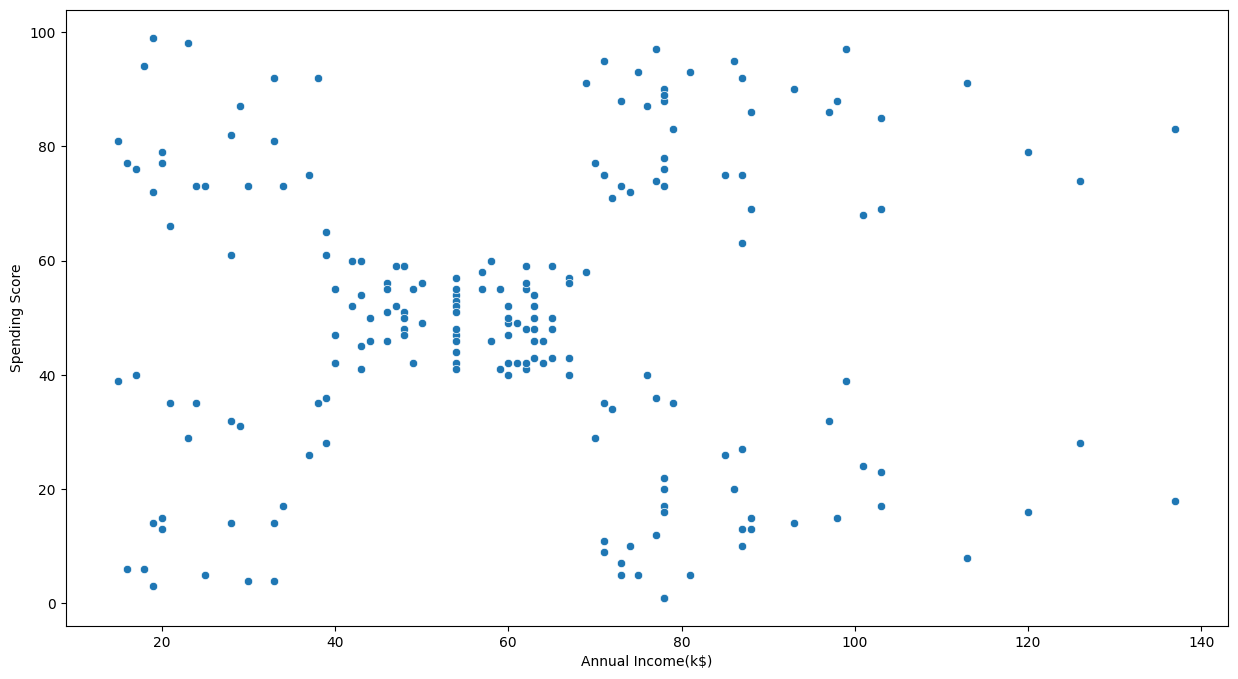

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

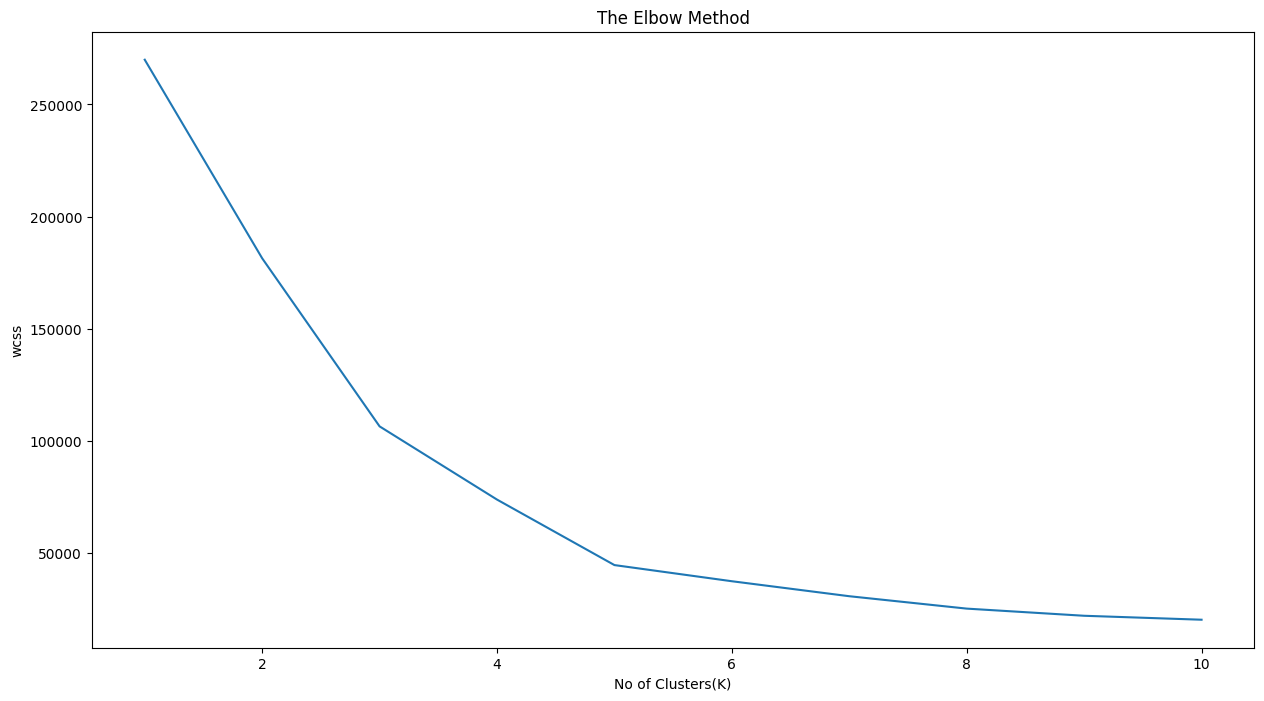

In [30]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init = 'k-means++' , random_state = 2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize = (15,8))
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters(K)')
plt.ylabel('wcss')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++' , random_state = 0)
Y = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

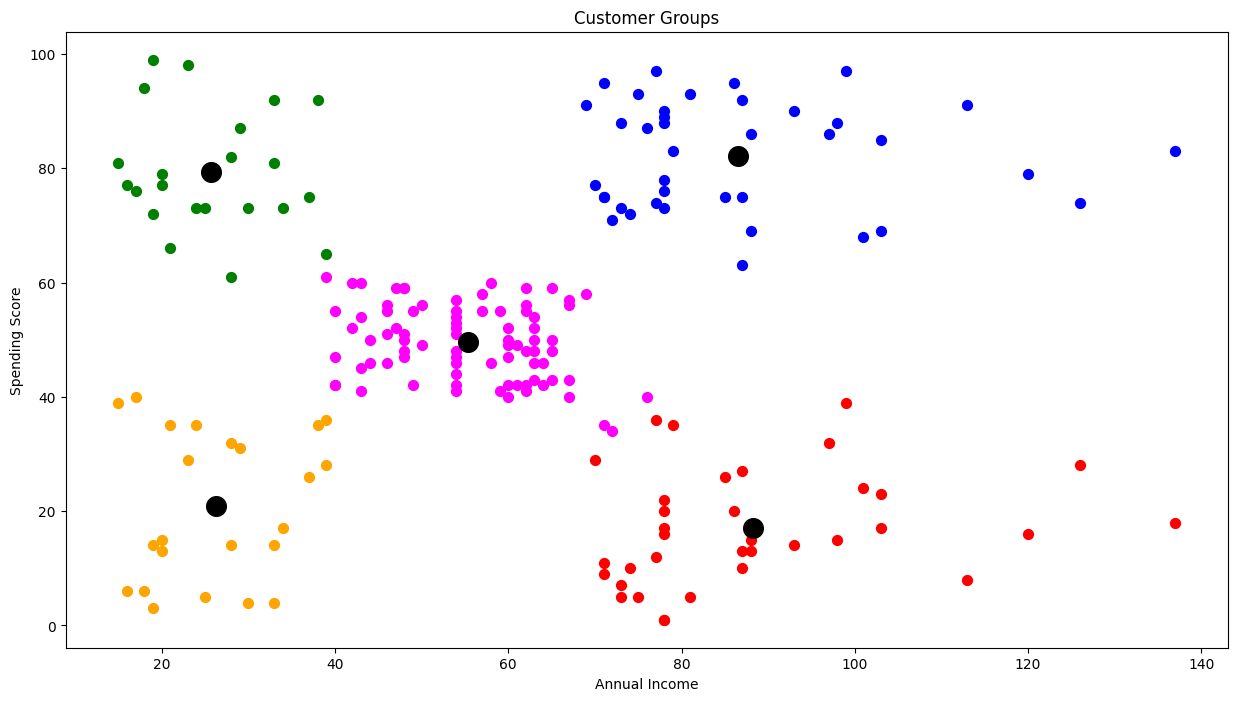

In [36]:
plt.figure(figsize = (15,8))
plt.scatter(X[Y==0,0] , X[Y==0,1], s =50 , c = 'red' , label = 'Cluster 1')
plt.scatter(X[Y==1,0] , X[Y==1,1], s =50 , c = 'magenta' , label = 'Cluster 2')
plt.scatter(X[Y==2,0] , X[Y==2,1], s =50 , c = 'blue' , label = 'Cluster 3')
plt.scatter(X[Y==3,0] , X[Y==3,1], s =50 , c = 'green' , label = 'Cluster 4')
plt.scatter(X[Y==4,0] , X[Y==4,1], s =50 , c = 'orange' , label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=200 , c= 'black' , label = 'C')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()